In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from shapely.wkt import loads

In [2]:
def load_vehicle_location(point):
    if point:
        return loads(point)
    else:
        return np.nan
filename = '../input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv'
usecols = ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract']
converters = {'Vehicle Location': load_vehicle_location}
dtype = {'Postal Code': str,   '2020 Census Tract': str}
df = pd.read_csv(filepath_or_buffer=filename,
                 converters=converters,
                 dtype=dtype,
                 usecols=usecols, )
df.shape

(135038, 17)

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,53067010910
1,1N4BZ1DV4N,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,53029972000
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,53061052502
3,5YJ3E1EBXL,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,53061050403


In [4]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                           object
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [5]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [6]:
state_counts = df['State'].value_counts()
state_counts_df = pd.DataFrame(data={'state': state_counts.index, 'count': state_counts.values})
state_counts_df.head()
# almost all of our cars are in WA

,state,count
0,WA,134726
1,CA,90
2,VA,33
3,MD,29
4,TX,18


In [7]:
# get the state of Washington since it's most of the data
# and drop the two vehicles with no location information
wa_df = df[df['State'] == 'WA']
wa_df = wa_df[~wa_df['Vehicle Location'].isna()]
wa_df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                   0
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [8]:
wa_df['latitude'] = wa_df['Vehicle Location'].apply(func=lambda x: x.x)
wa_df['longitude'] = wa_df['Vehicle Location'].apply(func=lambda x: x.y)
wa_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,latitude,longitude
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,1N4BZ1DV4N,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,5YJ3E1EBXL,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


<Axes: xlabel='latitude', ylabel='longitude'>

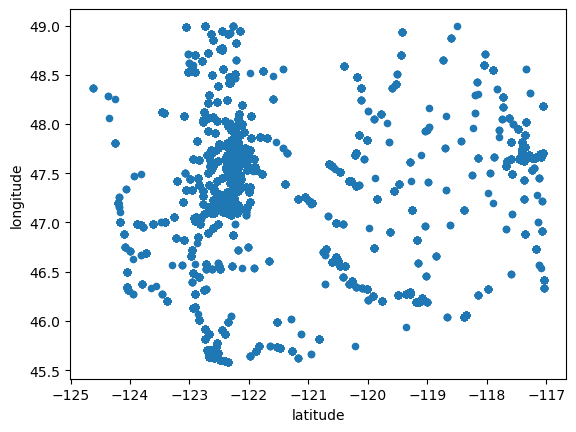

In [9]:
wa_df.plot(kind='scatter', x='latitude', y='longitude')